In [67]:
#import libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [68]:
#load data
input_file = 'car.data.txt'
#read data (.txt)
X = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)
        
X = np.array(X)
        

In [69]:
print(X[0])
print(list(enumerate(X[0])))
print(X[0][2])
print(X.shape)

['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
[(0, 'vhigh'), (1, 'vhigh'), (2, '2'), (3, '2'), (4, 'small'), (5, 'low'), (6, 'unacc')]
2
(1728, 7)


In [70]:
#transform strings to numerical data using label encoding
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):#enumerate obj yields pairs (i, X[0][i])
    label_encoder.append(preprocessing.LabelEncoder())#list of 6 LabelEncoder() s
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])#transform columns at a time
    #the above use different encoders for each attribute
    
X = X_encoded[:,:-1].astype(int)
y = X_encoded[:,-1].astype(int)
print("class labels: ",label_encoder[-1].classes_)

class labels:  ['acc' 'good' 'unacc' 'vgood']


In [71]:
"""
print(label_encoder[-1].classes_)
print(label_encoder[-1].fit_transform(X[0]))
print(label_encoder[-1].inverse_transform([4,4,0,0,2,1,3]))
"""

'\nprint(label_encoder[-1].classes_)\nprint(label_encoder[-1].fit_transform(X[0]))\nprint(label_encoder[-1].inverse_transform([4,4,0,0,2,1,3]))\n'

In [72]:
#Random Forest classifier
params = {'n_estimators': 200, 'max_depth':8, 'random_state': 7}
clf = RandomForestClassifier(**params)#* pass tuple, ** pass dictionary
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [73]:
#cross validation (depricated)
#from sklearn import cross_validation
#accuracy = cross_validation.cross_val_score(clf, X,y, scoring = 'accuracy', cv = 3)
#print("Accuracy of classifier: " + str(round(100*accuracy.mean(), 2)) + "%")

In [74]:
#updated cv
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, X,y, scoring = 'accuracy', cv = 3)
print("Accuracy of classifier:" + str(round(100*accuracy.mean(), 2))+"%")

Accuracy of classifier:78.19%


In [75]:
#test on single instance
input_data = ['vhigh', 'vhigh', '2','2','small','low']
input_data_encoded = [-1]*len(input_data)
print(input_data)
print(input_data_encoded)
for i, item in enumerate(input_data):
    input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
input_data_encoded = np.array(input_data_encoded)

print(input_data_encoded)

['vhigh', 'vhigh', '2', '2', 'small', 'low']
[-1, -1, -1, -1, -1, -1]
[3 3 0 0 2 1]


In [76]:
#predict output for this datapoint
output_class = clf.predict(input_data_encoded.reshape(1,-1))
#deprication warning if pass 1d array as data, so we need to 
#reshape X.reshape(-1,1) for single feature or X.reshape(1,-1) for single sample.
#we chose the later
print("Output class: ", label_encoder[-1].inverse_transform(output_class))

Output class:  ['unacc']


In [93]:
#Validation curves:
#useful for determining hyperparameters:  n_estimators and max_depth?
#how does each hyperparameter influence the training score when all other params fixed
from sklearn.model_selection import validation_curve
#sklearn.learning_curve is depricated
clf = RandomForestClassifier(max_depth = 4, random_state = 7)
parameter_grid = np.linspace(25,200,8).astype(int)#n_estimators
train_scores, validation_scores = validation_curve(clf, X,y, 'n_estimators', parameter_grid, cv=5)
#shape: (n_ticks, n_cvfolds)
print('###training and validation curves####')
print('param: n_estimators\nTraining scores:\n', train_scores)
print('param: n_estimators\nValidation scores:\n', validation_scores)

###validation curves####
param: n_estimators
Training scores:
 [[ 0.80680174  0.80824891  0.80752533  0.80463097  0.81358382]
 [ 0.79522431  0.80535456  0.81041968  0.8089725   0.81069364]
 [ 0.80101302  0.80680174  0.81114327  0.81476122  0.8150289 ]
 [ 0.8024602   0.80535456  0.81186686  0.80752533  0.80346821]
 [ 0.80028944  0.80463097  0.81114327  0.80824891  0.81069364]
 [ 0.80390738  0.80535456  0.81041968  0.80969609  0.81647399]
 [ 0.80390738  0.80463097  0.81114327  0.81476122  0.81719653]
 [ 0.80390738  0.80607815  0.81114327  0.81403763  0.81647399]]
param: n_estimators
Validation scores:
 [[ 0.71098266  0.76589595  0.72543353  0.76300578  0.75290698]
 [ 0.71098266  0.75433526  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.72254335  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.71387283  0.71965318  0.75722543  0.72674419]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266 

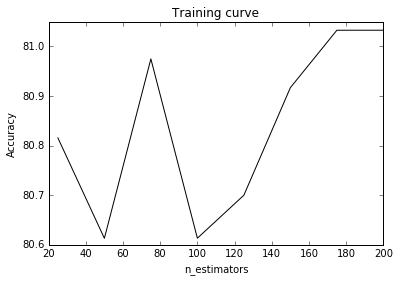

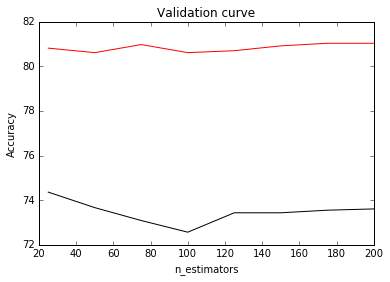

In [94]:
#plot training curve and validation curve for n_estimators
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'black')
#axis = 1: average over columns so each row has 1 average.
#Each n_estimator has a correspoding average score
plt.title('Training curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.figure()
plt.plot(parameter_grid, 100*np.average(validation_scores, axis = 1), color = 'black')

plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'red')#for comparison
#axis = 1: average over columns so each row has 1 average.
#Each n_estimator has a correspoding average score
plt.title('Validation curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [96]:
#same with max_depth param
clf = RandomForestClassifier(n_estimators=20, random_state= 7)
parameter_grid = np.linspace(2,10,5).astype(int)
train_scores, valid_scores = validation_curve(clf, X,y,"max_depth", parameter_grid, cv=5)
print('###validation curves####')
print('param: max_depth\nTraining scores:\n', train_scores)
print('param: max_depth\nValidation scores:\n', validation_scores)

###validation curves####
param: max_depth
Training scores:
 [[ 0.71852388  0.70043415  0.70043415  0.70043415  0.69942197]
 [ 0.80607815  0.80535456  0.80752533  0.79450072  0.81069364]
 [ 0.90665702  0.91027496  0.92836469  0.89797395  0.90679191]
 [ 0.97467438  0.96743849  0.96888567  0.97829233  0.96820809]
 [ 0.99421129  0.99710564  0.99782923  0.99855282  0.99277457]]
param: max_depth
Validation scores:
 [[ 0.71098266  0.76589595  0.72543353  0.76300578  0.75290698]
 [ 0.71098266  0.75433526  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.72254335  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.71387283  0.71965318  0.75722543  0.72674419]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74566474  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.75144509  0.71965318  0.75722543  0.74127907]]


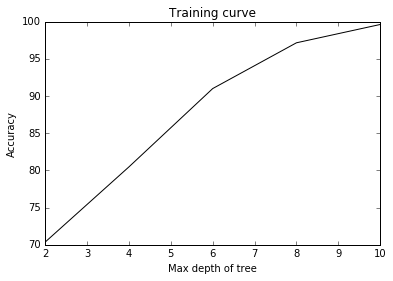

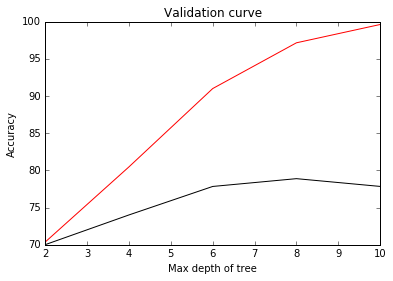

In [98]:
#plot training curve for max_depth
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'black')
plt.title('Training curve')
plt.xlabel('Max depth of tree'),
plt.ylabel('Accuracy')
plt.show()
#plot validation curve for max_depth
plt.figure()
plt.plot(parameter_grid, 100*np.average(valid_scores, axis = 1), color = 'black')
plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'red')#for comparison
plt.title('Validation curve')
plt.xlabel('Max depth of tree'),
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#overfitting for large max_depth

In [108]:
#learning curves: how does size of training set influence model?
from sklearn.model_selection import learning_curve
clf = RandomForestClassifier(random_state = 7)
parameter_grid = np.array([200,500,800,1000])
train_sizes ,train_scores, validation_scores = learning_curve(clf, X,y,train_sizes = parameter_grid, cv = 5)
print('\n###Learning Curves####')
print('\nTraining scores: \n',train_scores)
print('\nValidation scores: \n', validation_scores)


###Learning Curves####

Training scores: 
 [[ 1.       1.       1.       1.       1.     ]
 [ 1.       1.       0.998    0.998    0.998  ]
 [ 0.99875  0.9975   0.99875  0.99875  0.99875]
 [ 0.997    0.999    0.999    0.999    0.998  ]]

Validation scores: 
 [[ 0.69942197  0.69942197  0.69942197  0.69942197  0.70348837]
 [ 0.74855491  0.65028902  0.76878613  0.76589595  0.70348837]
 [ 0.70520231  0.78612717  0.52312139  0.76878613  0.77034884]
 [ 0.5982659   0.76589595  0.55780347  0.75144509  0.76744186]]


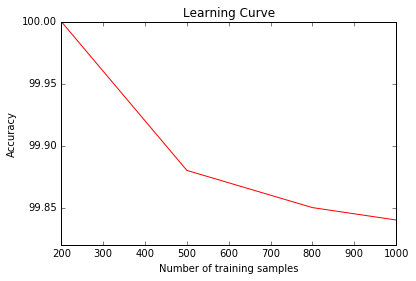

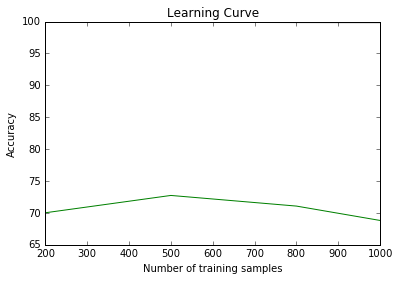

In [109]:
#plot learning curve (training):
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'red')
#plt.plot(parameter_grid, 100*np.average(validation_scores, axis = 1), color = 'green')

plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()
#plot learning curve (validation (cross-validation)):
plt.figure()
#plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'black')
plt.plot(parameter_grid, 100*np.average(validation_scores, axis = 1), color = 'green')
plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#although smaller training sets give better accuracy, they are more prone to overfitting